# Modelling

In [368]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams
rcParams['figure.figsize'] = 25, 20
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
matplotlib.style.use('ggplot')
import statsmodels.formula.api as smf
import statsmodels.api as sm
import missingno as msno
import sklearn
%matplotlib inline

## fmanual_feature_Select analysis

In [369]:
ffs_players_salary = pd.read_csv('fmanual_feature_Select_players_salary.csv.gz',index_col=0)

In [370]:
ffs_players_salary.head()

,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS
0,19863636.0,33.0,5.4,12.5,8.6,4.2,2.4,3.5,5.8,3.7,1.6,14.4
1,2329200.0,23.6,3.5,8.6,5.1,2.1,1.1,1.2,1.9,3.3,1.3,9.4
3,1618520.0,15.8,2.1,4.6,2.4,1.3,1.0,1.3,1.6,0.7,0.8,6.0
5,1000000.0,10.9,1.1,2.8,1.0,0.6,0.3,0.5,1.0,0.5,0.3,3.1
6,28000000.0,30.8,4.8,10.9,6.5,3.3,0.9,1.2,5.3,4.1,1.1,12.0


In [371]:
salary_col = ffs_players_salary['Salary']
salary_scaled = (salary_col-salary_col.min())/(salary_col.max()-salary_col.min())
ffs_players_salary['salary_scaled']= salary_scaled.copy()
ffs_players_salary.head()

,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS,salary_scaled
0,19863636.0,33.0,5.4,12.5,8.6,4.2,2.4,3.5,5.8,3.7,1.6,14.4,0.489285
1,2329200.0,23.6,3.5,8.6,5.1,2.1,1.1,1.2,1.9,3.3,1.3,9.4,0.049622
3,1618520.0,15.8,2.1,4.6,2.4,1.3,1.0,1.3,1.6,0.7,0.8,6.0,0.031802
5,1000000.0,10.9,1.1,2.8,1.0,0.6,0.3,0.5,1.0,0.5,0.3,3.1,0.016294
6,28000000.0,30.8,4.8,10.9,6.5,3.3,0.9,1.2,5.3,4.1,1.1,12.0,0.693298


### linear regression

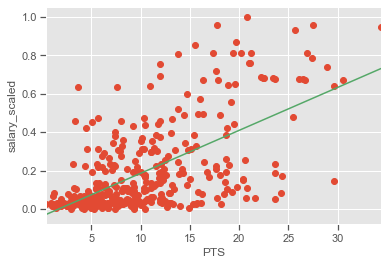

                            OLS Regression Results                            
Dep. Variable:          salary_scaled   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     252.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           4.95e-44
Time:                        13:07:25   Log-Likelihood:                 123.77
No. Observations:                 385   AIC:                            -243.5
Df Residuals:                     383   BIC:                            -235.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0367      0.017     -2.193      0.0

In [372]:
linear_model = smf.ols(formula='salary_scaled ~ 1 + PTS', data=ffs_players_salary).fit()


plt.xlabel('PTS')
plt.ylabel('salary_scaled')
x = pd.DataFrame({'PTS': np.linspace(ffs_players_salary.PTS.min(), ffs_players_salary.PTS.max(), len(ffs_players_salary.PTS)) })

x_min = ffs_players_salary.PTS.min()
x_max = ffs_players_salary.PTS.max()
plt.xlim(x_min,x_max)
plt.plot(ffs_players_salary.PTS,ffs_players_salary.salary_scaled, 'o')
plt.plot(x, linear_model.predict(x), 'g-',)


plt.show()
print(linear_model.summary())

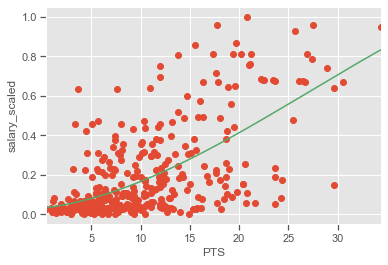

                            OLS Regression Results                            
Dep. Variable:          salary_scaled   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     86.93
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           7.20e-43
Time:                        13:07:25   Log-Likelihood:                 126.68
No. Observations:                 385   AIC:                            -245.4
Df Residuals:                     381   BIC:                            -229.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0316      0.041      0.770

In [373]:
linear_model2 = smf.ols(formula='salary_scaled ~ 1 + PTS + I(PTS ** 2.0)+I(PTS ** 3.0)', data=ffs_players_salary).fit()



plt.xlabel('PTS')
plt.ylabel('salary_scaled')
x = pd.DataFrame({'PTS': np.linspace(ffs_players_salary.PTS.min(), ffs_players_salary.PTS.max(), len(ffs_players_salary.PTS)) })

x_min = ffs_players_salary.PTS.min()
x_max = ffs_players_salary.PTS.max()
plt.xlim(x_min,x_max)
plt.plot(ffs_players_salary.PTS,ffs_players_salary.salary_scaled, 'o')
plt.plot(x, linear_model2.predict(x), 'g-',)


plt.show()
print(linear_model2.summary())

In [374]:
linear_model3 = smf.ols(formula='salary_scaled ~ 1 + MP+ FG+ FGA+ FT+ FTA+ DRB+ AST+TOV+ PTS + P2A+P2', data=ffs_players_salary).fit()
print(linear_model3.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_scaled   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     32.76
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.45e-48
Time:                        13:07:25   Log-Likelihood:                 156.44
No. Observations:                 385   AIC:                            -288.9
Df Residuals:                     373   BIC:                            -241.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0529      0.027     -1.988      0.0

# using sklearn

In [375]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


## Regression

In [376]:
ffs_players_salary = pd.read_csv('fmanual_feature_Select_players_salary.csv.gz',index_col=0)
ffs_players_salary.head()

,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS
0,19863636.0,33.0,5.4,12.5,8.6,4.2,2.4,3.5,5.8,3.7,1.6,14.4
1,2329200.0,23.6,3.5,8.6,5.1,2.1,1.1,1.2,1.9,3.3,1.3,9.4
3,1618520.0,15.8,2.1,4.6,2.4,1.3,1.0,1.3,1.6,0.7,0.8,6.0
5,1000000.0,10.9,1.1,2.8,1.0,0.6,0.3,0.5,1.0,0.5,0.3,3.1
6,28000000.0,30.8,4.8,10.9,6.5,3.3,0.9,1.2,5.3,4.1,1.1,12.0


In [377]:
features_name = [ 'MP', 'FG', 'FGA', 'P2A', 'P2', 'FT', 'FTA', 'DRB', 'AST',
       'TOV', 'PTS']
X = clear_players_salary[features_name]
y = clear_players_salary['Salary']

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=666)

In [379]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(308, 11)
(308,)
(77, 11)
(77,)


In [380]:
poly_reg = Pipeline([
    ('poly',PolynomialFeatures(degree=1)),
#     ('poly',PolynomialFeatures(degree=2)),
#     ('poly',PolynomialFeatures(degree=5)),
    ('std_scaler',RobustScaler()),
#     ('std_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])

In [381]:
poly_reg.fit(X_train,y_train)
poly_reg.score(X_train, y_train)

0.4962529768964077

In [382]:
y_train_predict = poly_reg.predict(X_train)
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_train_predict))
print('Coefficient of determination: %.2f'% r2_score(y_train, y_train_predict))

Mean squared error: 43958403240358.06
Coefficient of determination: 0.50


In [383]:
poly_reg.score(X_test, y_test)
y_test_predict = poly_reg.predict(X_test)
print('Mean squared error: %.2f'  % mean_squared_error(y_test, y_test_predict))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_test_predict))

Mean squared error: 33117430341132.22
Coefficient of determination: 0.40


In [384]:
# predicted = cross_val_predict(poly_reg, X_train, y_train, cv=10)

# fig, ax = plt.subplots()
# ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
# ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()

## Classifier

In [385]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import  KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support



In [386]:
ffs_players_salary = pd.read_csv('fmanual_feature_Select_players_salary.csv.gz',index_col=0)
ffs_players_salary.head()

,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS
0,19863636.0,33.0,5.4,12.5,8.6,4.2,2.4,3.5,5.8,3.7,1.6,14.4
1,2329200.0,23.6,3.5,8.6,5.1,2.1,1.1,1.2,1.9,3.3,1.3,9.4
3,1618520.0,15.8,2.1,4.6,2.4,1.3,1.0,1.3,1.6,0.7,0.8,6.0
5,1000000.0,10.9,1.1,2.8,1.0,0.6,0.3,0.5,1.0,0.5,0.3,3.1
6,28000000.0,30.8,4.8,10.9,6.5,3.3,0.9,1.2,5.3,4.1,1.1,12.0


In [387]:
salary_col = ffs_players_salary['Salary']
salary_scaled = (salary_col-salary_col.min())/(salary_col.max()-salary_col.min())
ffs_players_salary['salary_scaled']= salary_scaled.copy()
ffs_players_salary.head()

,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS,salary_scaled
0,19863636.0,33.0,5.4,12.5,8.6,4.2,2.4,3.5,5.8,3.7,1.6,14.4,0.489285
1,2329200.0,23.6,3.5,8.6,5.1,2.1,1.1,1.2,1.9,3.3,1.3,9.4,0.049622
3,1618520.0,15.8,2.1,4.6,2.4,1.3,1.0,1.3,1.6,0.7,0.8,6.0,0.031802
5,1000000.0,10.9,1.1,2.8,1.0,0.6,0.3,0.5,1.0,0.5,0.3,3.1,0.016294
6,28000000.0,30.8,4.8,10.9,6.5,3.3,0.9,1.2,5.3,4.1,1.1,12.0,0.693298


In [388]:
conditions = [
        (ffs_players_salary['salary_scaled']  <= 0.2),
        (ffs_players_salary['salary_scaled']  <= 0.4),
        (ffs_players_salary['salary_scaled']  <= 0.6),
        (ffs_players_salary['salary_scaled']  > 0.8)
]
choices = [1, 2,3,4]
ffs_players_salary['Nominal'] = np.select(conditions, choices, default=3)
ffs_players_salary.head()
# edge players（边缘球员）
# normal players（轮换球员）
# first players（首发球员）
# stars（明星球员）

,Salary,MP,FG,FGA,P2A,P2,FT,FTA,DRB,AST,TOV,PTS,salary_scaled,Nominal
0,19863636.0,33.0,5.4,12.5,8.6,4.2,2.4,3.5,5.8,3.7,1.6,14.4,0.489285,3
1,2329200.0,23.6,3.5,8.6,5.1,2.1,1.1,1.2,1.9,3.3,1.3,9.4,0.049622,1
3,1618520.0,15.8,2.1,4.6,2.4,1.3,1.0,1.3,1.6,0.7,0.8,6.0,0.031802,1
5,1000000.0,10.9,1.1,2.8,1.0,0.6,0.3,0.5,1.0,0.5,0.3,3.1,0.016294,1
6,28000000.0,30.8,4.8,10.9,6.5,3.3,0.9,1.2,5.3,4.1,1.1,12.0,0.693298,3


In [ ]:
#大部分的NBA球员薪资还是处于较低的水平，而其中间薪资的球员也是比较多，薪水较高的球员较少，这也符合正常规律
bar=ffs_players_salary['Nominal'].value_counts()
sns.set(font_scale=2)
sns.set(style="white", palette="muted",color_codes=True)
plt.figure(figsize=(10,7))
# sns.barplot(y=data_std_c1['Nominal'], palette="deep")
ax = sns.barplot(x=bar.index,y=bar )
ax.set(xlabel='Level',ylabel='Number',title="Salary_Level")

[Text(0, 0.5, 'Number'), Text(0.5, 0, 'Level'), Text(0.5, 1.0, 'Salary_Level')]

In [336]:
features_name = [ 'MP', 'FG', 'FGA', 'P2A', 'P2', 'FT', 'FTA', 'DRB', 'AST','TOV', 'PTS']

X = ffs_players_salary[features_name]
y = ffs_players_salary['Nominal']


## KNN

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=666)

In [338]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(308, 11)
(308,)
(77, 11)
(77,)


In [339]:
best_score = 0.0
best_k = 0
best_weights = ''
best_metric =''

weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan','chebyshev']
for weight in weights:
    
    for metr in metric:

        for k in range(3, 20):
            knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric= metr,
                   metric_params=None, n_jobs=None, n_neighbors=k, p=1,
                   weights= weight )

            knn.fit(X_train,y_train)
            y_train_predict = knn.predict(X_train)
            score = accuracy_score(y_train,y_train_predict)
            if score > best_score :
                best_score = score
                best_k = k
                best_metric = metr
                best_weights = weight

print('best_score:',best_score)
print('best_k:',best_k)
print('best_metric:',best_metric)
print('best_weights:',best_weights)

best_score: 1.0
best_k: 3
best_metric: minkowski
best_weights: distance


In [340]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=1,
           weights='distance',
                          )
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='distance')

In [341]:
y_train_predict = knn.predict(X_train)
print ("KNN Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

KNN Train Accuracy: 1.000


In [342]:
y_test_predict = knn.predict(X_test)
print ("KNN Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

KNN Test Accuracy: 0.649


              precision    recall  f1-score   support

           1       0.75      0.88      0.81        56
           2       0.33      0.08      0.12        13
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.65        77
   macro avg       0.27      0.24      0.23        77
weighted avg       0.60      0.65      0.61        77



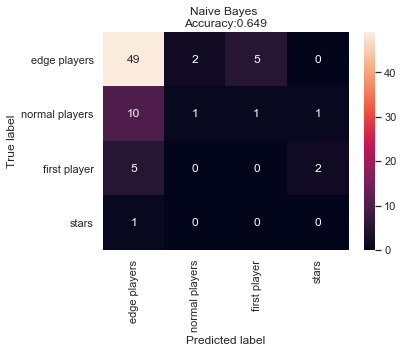

In [351]:
print (classification_report(y_test,y_test_predict))
cm = confusion_matrix(y_test, y_test_predict) 
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players','first player','stars'], 
                     columns = ['edge players','normal players','first player','stars'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_test_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## SVM

In [362]:
svm= SVC(C=1, kernel='rbf', degree=2, gamma=0.005,coef0=1,shrinking=True, tol=0.5,probability=False,
        max_iter=-1,)
svm.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.5,
    verbose=False)

In [363]:
y_train_predict = svm.predict(X_train)
print ("SVM Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

SVM Train Accuracy: 0.701


In [364]:
y_test_predict = svm.predict(X_test)
print("Logistic Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

Logistic Test Accuracy: 0.740


              precision    recall  f1-score   support

           1       0.76      0.96      0.85        56
           2       0.00      0.00      0.00        13
           3       0.50      0.43      0.46         7
           4       0.00      0.00      0.00         1

    accuracy                           0.74        77
   macro avg       0.32      0.35      0.33        77
weighted avg       0.60      0.74      0.66        77



/Users/Tommy/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


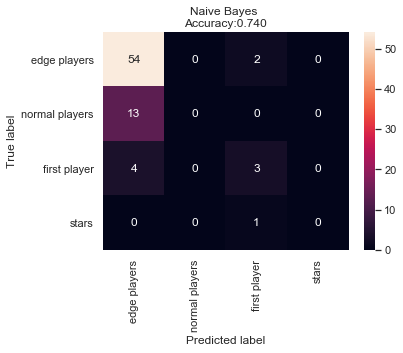

In [365]:
print (classification_report(y_test,y_test_predict))
cm = confusion_matrix(y_test, y_test_predict) 
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players','first player','stars'], 
                     columns = ['edge players','normal players','first player','stars'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_test_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest¶

In [366]:
forest = RandomForestClassifier(criterion='gini', max_leaf_nodes=None,
                                n_estimators = 100, random_state =1,
                                n_jobs =-1,verbose=True, oob_score=True)
forest.fit(X_train,y_train)
forest.oob_score_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


0.6655844155844156

In [367]:
y_train_predict = forest.predict(X_train)
print ("Random Forest Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))


Random Forest Train Accuracy: 1.000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [356]:
y_test_predict = forest.predict(X_test)
print("Random Forest Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Random Forest Test Accuracy: 0.662


Text(0.5, 1.0, 'Feature Importance')

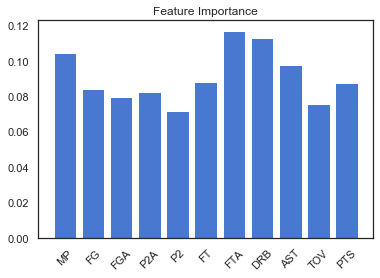

In [359]:
plt.bar(range(len(X_train.columns.values)), forest.feature_importances_)
plt.xticks(range(len(X_train.columns.values)),X_train.columns.values, rotation= 45)
plt.title('Feature Importance')

              precision    recall  f1-score   support

           1       0.75      0.89      0.81        56
           2       0.00      0.00      0.00        13
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         1

    accuracy                           0.66        77
   macro avg       0.23      0.26      0.24        77
weighted avg       0.56      0.66      0.61        77



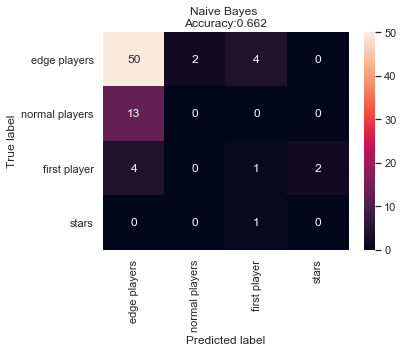

In [360]:
print (classification_report(y_test,y_test_predict))
cm = confusion_matrix(y_test, y_test_predict) 
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players','first player','stars'], 
                     columns = ['edge players','normal players','first player','stars'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_test_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

*****
